## Importing Libriaries 

In [1]:
import numpy as np
import sklearn
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing Data

In [2]:
data = scipy.io.loadmat('data.mat')
test = scipy.io.loadmat('test.mat')

X = data['X']
Y = data['S']

Xt = test['Xt']
Yt = test['St']


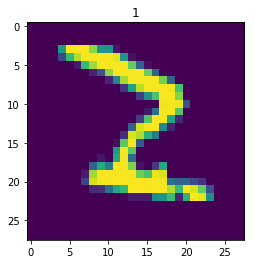

In [3]:

ct =0
img = np.eye(28)
# print(img)
# w[:,:28]
# print(w[:28,0].shape)
linha = X[0,:]
# print((linha))
for i in range(1):
    for j in range(28):
        img[j] = X[i,ct:ct+28]
        ct+=28
    plt.title(i+1)    
    plt.imshow(np.rot90(img))
    plt.show()
    ct=0
#     plt.subfigure()
    
    

## Separating the Train,Validation and Test data

In [4]:
N, m = X.shape
Nt, mt = Xt.shape

Xtr, Xv, Ytr, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

Nv,mv = Xv.shape


In [5]:
def bestc(Xtr,Ytr,Yv,vmin,vmax,k):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):

        tx_acerto_max = 0
        c = 2**p
        w = np.dot(np.linalg.inv(np.dot(Xtr.T,Xtr)+c*np.eye(m)),np.dot(Xtr.T,Ytr))

        Y_est = np.dot(Xv,w)

        err_graph.append(np.linalg.norm(Y_est-Yv)**2)

        acerto = 0
        #Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if Yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [6]:
def bestc_refined(Xtr,Ytr,Yv,vmin,vmax,k):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):
        tx_acerto_max = 0
        c = p
        w = np.dot(np.linalg.inv(np.dot(Xtr.T,Xtr)+c*np.eye(m)),np.dot(Xtr.T,Ytr))
        Y_est = np.dot(Xv,w)        
        acerto = 0
        
        err_graph.append(np.linalg.norm(Y_est-Yv)**2)
        
        #Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])
            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)

            if Yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)


        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
        
        
    return c_graph,tx_graph,err_graph,w

## Ploting Results

First, a robust find for the best regularization coeficient. Finding between $2^{-1}$ to $2^{15}$, varianting the "power of" value.

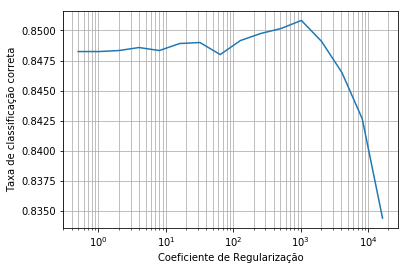

Max value of c: 1024


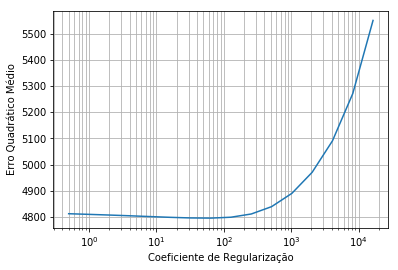

Min value of err: 64


In [7]:
c, t, err = bestc(Xtr,Ytr,Yv,-1,15,1)
plt.grid(True, which="both")
plt.semilogx(c,t)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
t_max = max(t)
idx_max = t.index(t_max)
print('Max value of c:',c[idx_max] )
plt.grid(True, which="both")
plt.semilogx(c,err)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio')
plt.show()
err_min = min(err)
idx_min = err.index(err_min)
print('Min value of err:', c[idx_min])


Now, for a precise search of the regularization coeficient. It is done the same approach, however, with a refined values.

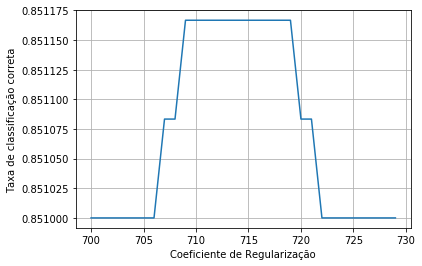

Max value of c: 709


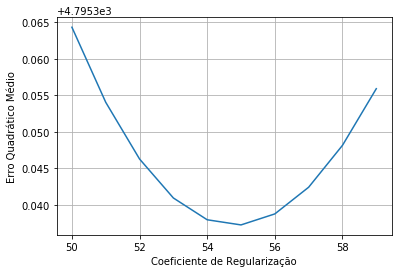

Min value of err: 55 

(784, 10)


In [8]:
c_r, t_r, err_r, w = bestc_refined(Xtr,Ytr,Yv,700,730,1)
plt.grid(True, which="both")
plt.plot(c_r,t_r)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
t_max = max(t_r)
idx_max = t_r.index(t_max)
print('Max value of c:',c_r[idx_max] )

c_r, t_r, err_r, w2 = bestc_refined(Xtr,Ytr,Yv,50,60,1)
plt.grid(True, which="both")
plt.plot(c_r,err_r)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio')
plt.show()
err_min = min(err_r)
idx_min = err_r.index(err_min)
print('Min value of err:', c_r[idx_min], '\n')
print(w.shape)

# Ploting the Calor map of the Weights. 

The principal caractheristic of each number image:

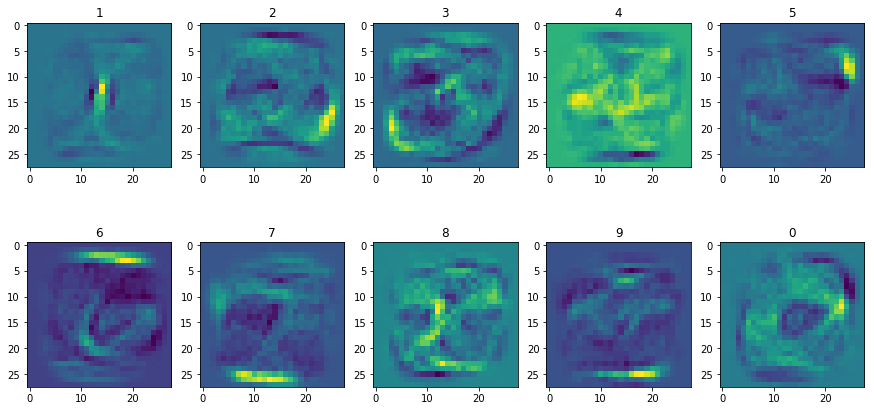

In [9]:
c = 715
w = np.dot(np.linalg.inv(np.dot(Xtr.T,Xtr)+c*np.eye(m)),np.dot(Xtr.T,Ytr))
# print(w.shape)
ct =0
img = np.eye(28)
plt.figure(figsize = (15,60))
# w[:,:28]
# print(w[:28,0].shape)
for i in range(w.shape[1]):
    for j in range(28):
        img[j] = w[ct:ct+28,i]
#         print(len(w[ct:ct+28,i]))
        ct+=28
    plt.subplot(15,5,i+1)
    img = np.flip(img,1)
    if i==9:
        plt.title('0')
    else:
        plt.title(i+1)    
    plt.imshow(np.rot90(img))
    
    ct=0
plt.show()


np.set_printoptions(threshold=np.inf)
np.savetxt('weights.txt',w,fmt='%f')

#     plt.subfigure()
#     plt.title(i+1)
#     plt.imshow(np.rot90(img))
#     plt.show()

# Avalianting the predictions and the true values

In [10]:
c = 715
w = np.dot(np.linalg.inv(np.dot(Xtr.T,Xtr)+c*np.eye(m)),np.dot(Xtr.T,Ytr))
Y_est_t = np.dot(Xt,w) 
Yt_est = np.zeros(Y_est_t.shape)

for row in range(Y_est_t.shape[0]):
    #maximum value of each Y row
    max_value = max(Y_est_t[row,:])
    #Position of the max value in the Row
    indmax = np.where(Y_est_t[row,:]==max_value)
    Yt_est[row,indmax[0][0]] =  1
    
Yt_est = Yt_est.astype(int)

pred = []
true = []


for i in range(Yt.shape[0]):

    pred.append(np.where(Yt_est[i]==1)[0][0]+1)
    true.append(np.where(Yt[i]==1)[0][0]+1)


# Generating the Confusion Matrix

[[1107    2    2    1    0    5    2   16    0    0]
 [  62  824   22   15    0   25   20   41    5   18]
 [  14   25  887    3   12    9   26   18   11    5]
 [  21    6    2  875    1   11    1   13   51    1]
 [  13    7   98   22  592   25   18   74   23   20]
 [   9    5    0   16   15  885    0   10    0   18]
 [  43   17    7   16    0    2  887    2   49    5]
 [  59   10   30   25   38   17   13  747   22   13]
 [  14    5   14   65    0    1   62    8  822   18]
 [   0    1    2    2    8   17    1    7    1  941]]


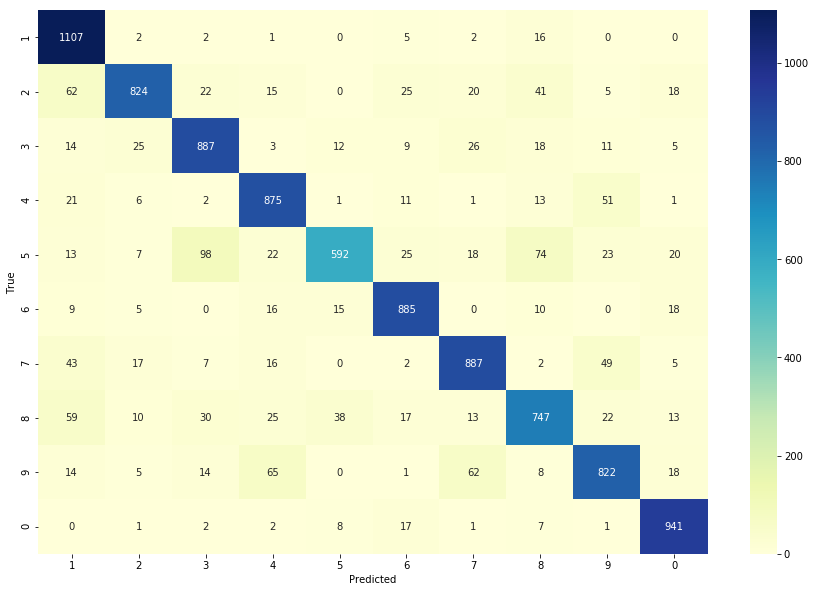

In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
conf = confusion_matrix(true, pred )

print(conf)

df_cm = pd.DataFrame(conf, index = [i for i in "1234567890"],
                  columns = [i for i in "1234567890"])
plt.figure(figsize = (15,10))

sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

# plt.figure(figsize = (10,7))
# ax= plt.subplot()
# sn.heatmap(conf, annot=True, ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Observating the wrong predictions

Wrong line: 11
True value: 6
Prediction: 4 



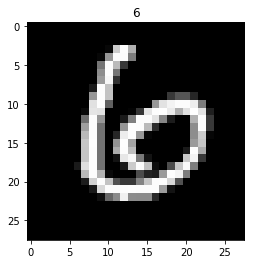

Wrong line: 33
True value: 4
Prediction: 0


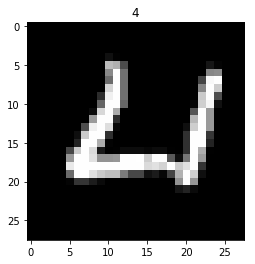

Wrong line: 38
True value: 2
Prediction: 3 



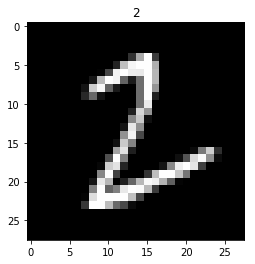

Wrong line: 45
True value: 5
Prediction: 3 



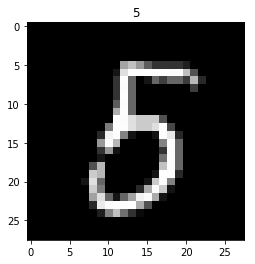

Wrong line: 46
True value: 1
Prediction: 3 



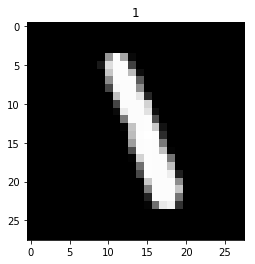

In [15]:
count=0
jf =[]
wrong =[]
for i in range(len(pred)):
    if true[i]!=pred[i]:
        if true[i] in jf:
            pass
        else:
            wrong.append(i)
            print('Wrong line:', i)
            print('True value:',true[i])
            if pred[i]==10:
                print('Prediction: 0')
            else:
                print('Prediction:',pred[i],'\n')
            jf.append(true[i])
            count+=1
            # showing the number
            ct =0
            img = np.eye(28)
            for j in range(28):
                img[j] = Xt[i,ct:ct+28]
                ct+=28
            img = np.flip(img,1)
            plt.title(true[i])    
            plt.imshow(np.rot90(img),cmap ='gray')
            plt.show()
            ct=0
            if count ==5:
                break
        
        
        
    
